In [7]:
!pip install scipy

In [4]:
import numpy as np
from scipy import stats
import scipy.stats as stats
from scipy.stats import t
import matplotlib.pyplot as plt

# Mean, Median and Mode

In [67]:
data= [2,3,4,62,5,7,3,6,3,3,4,7,3]

#Mean
mean= np.mean(data)

#Median
median= np.median(data)

#Mode
mode= stats.mode(data)[0]

print(f'Mean= {mean}, Median= {median}, Mode= {mode}')

Mean= 8.615384615384615, Median= 4.0, Mode= 3


# Range

* Range= max(x) - min(x) 
* Where x is the dataset.

In [68]:
# Range
data_range= max(data) - min(data)
print(f'Range= {data_range}')

Range= 60


# Standard Deviation:

#### "A quantity expressing by how much the members of a group differ from the mean value for the group."
* It shows how much each value on average deviates from the mean value.

# Standard Deviation of Population
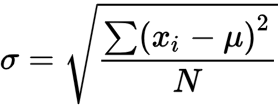

* sigma =	population standard deviation
* N     =	the size of the population
* xi	  =	each value from the population
* mu	  =	the population mean

# Standard Deviation of Sample
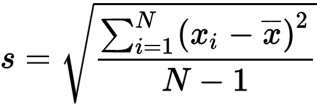

* s	=	sample standard deviation
* N	=	the number of observations
* x_i	=	the observed values of a sample item
* overline (x)	=	the mean value of the observations

In [69]:
# Standard deviation of the population
std_dev= np.std(data)

# Standard deviation of the sample
std_dev_sm= np.std(data, ddof= 1)

print(f"Standard Deviation of Population= {std_dev}, Standard Deviation of Sample= {std_dev_sm}")

Standard Deviation of Population= 15.489641509177682, Standard Deviation of Sample= 16.122130036787226


# VARIANCE



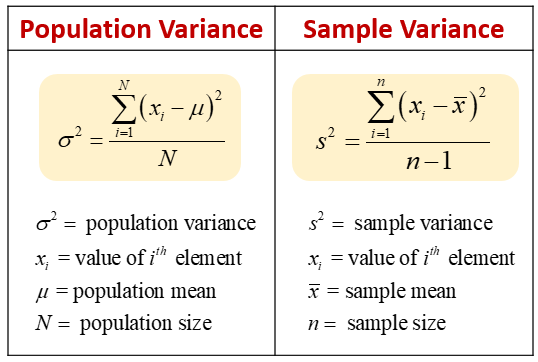

In [70]:
# Calculating Variance of Population
var_pop= np.var(data)

# Calculating variance of sample
var_sample= np.var(data, ddof= 1)

print(f'Variance of Population= {var_pop: .2f}, Variance of Sample= {var_sample: .2f}')

Variance of Population=  239.93, Variance of Sample=  259.92


# Interquartile Range
* Q1= (N+1)/4
* Q3= ((N+1)*3)/4

# IQR
#### IQR= Q3-Q1

In [71]:
print(len(data))
x= np.sort(data)
print(x)

13
[ 2  3  3  3  3  3  4  4  5  6  7  7 62]


In [72]:

# Calculatin Q1.
Q1= np.percentile(data, 25)
print(f'Q1={Q1}')

# Calculatin Q3.
Q3= np.percentile(data, 75)
print(f'Q3= {Q3}')

# Calculatin IQR.
IQR= Q3-Q1

print(f'Inter Quartile Range= {IQR}')

Q1=3.0
Q3= 6.0
Inter Quartile Range= 3.0


# Visualization of IQR

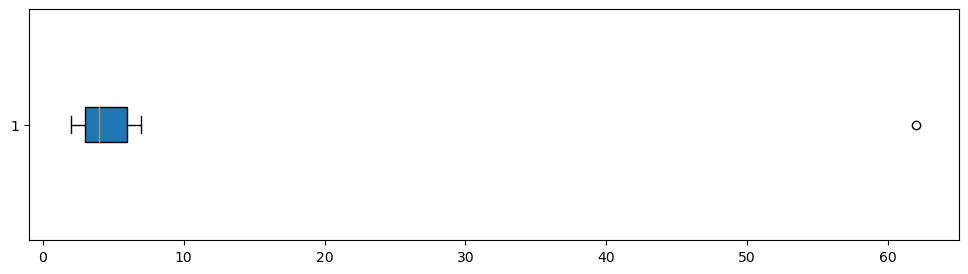

In [73]:
# Plotting Boxplot
plt.figure(figsize=(12,3))
plt.boxplot(data, vert= False, patch_artist= True)
plt.show()

# Normal Distribution

Mean= 8.615384615384615
Standard Deviation= 15.489641509177682


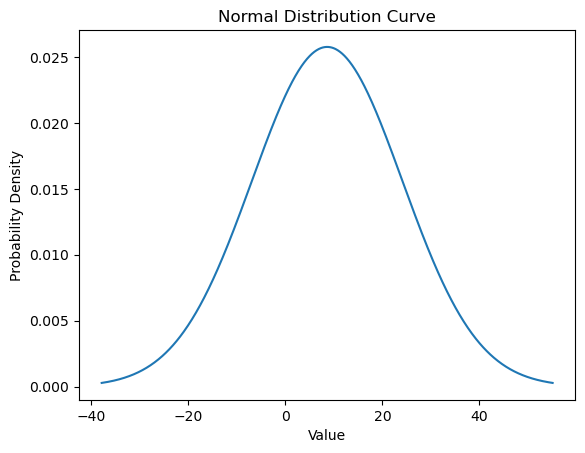

In [79]:
print(f'Mean= {mean}')
print(f'Standard Deviation= {std_dev}')
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev)**2)

plt.plot(x, y)
plt.title('Normal Distribution Curve')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()


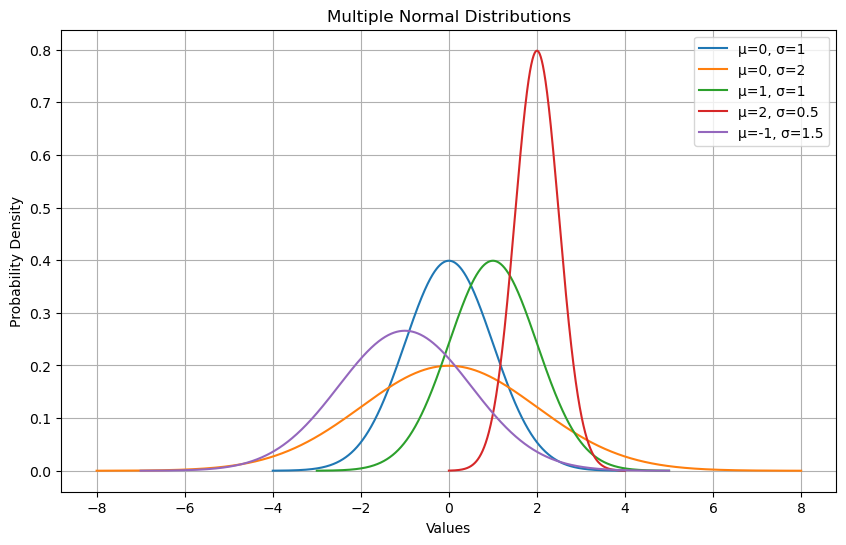

In [80]:
def plot_multiple_normal_distributions(parameters, num_points=1000):
    """
    This function plots multiple normal distributions on the same plot, each with
    different mean (mu) and standard deviation (sigma).

    Parameters:
    - parameters: A list of tuples, where each tuple contains (mean, std_dev) for a distribution.
    - num_points: Number of points to generate for each plot. Default is 1000.

    Returns:
    - A plot with multiple normal distribution curves.
    """

    plt.figure(figsize=(10, 6))

    # Generating and plotting each normal distribution
    for mean, std_dev in parameters:
        # Generating a range of x values
        x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, num_points)
        # Generating the y values for normal distribution
        y = stats.norm.pdf(x, mean, std_dev)
        # Plotting the curve
        plt.plot(x, y, label=f'μ={mean}, σ={std_dev}')

    plt.title('Multiple Normal Distributions')
    plt.xlabel('Values')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage with different parameters
parameters = [
    (0, 1),   # Mean = 0, Standard Deviation = 1
    (0, 2),   # Mean = 0, Standard Deviation = 2
    (1, 1),   # Mean = 1, Standard Deviation = 1
    (2, 0.5), # Mean = 2, Standard Deviation = 0.5
    (-1, 1.5) # Mean = -1, Standard Deviation = 1.5
]

plot_multiple_normal_distributions(parameters)

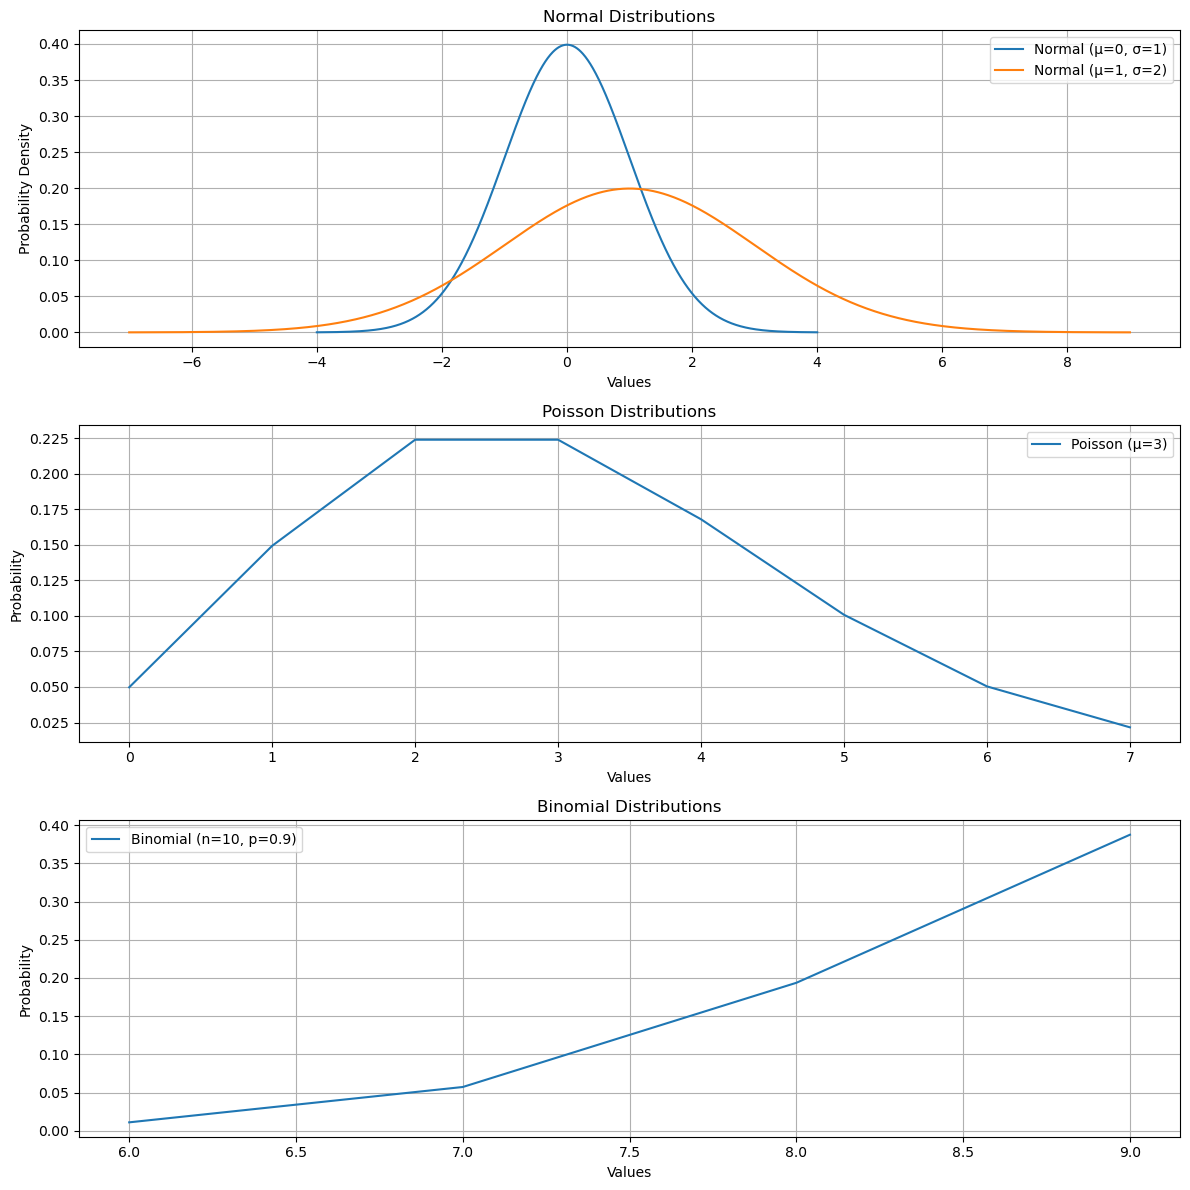

In [81]:
def plot_separate_distributions(distribution_params, num_points=1000):
    """
    This function plots different types of distributions (Normal, Poisson, Binomial, etc.) 
    in separate subplots, each with different parameters.

    Parameters:
    - distribution_params: A dictionary where keys are distribution names and values are lists of tuples,
                            each tuple containing parameters for that distribution.
    - num_points: Number of points to generate for each plot. Default is 1000.

    Returns:
    - A figure with separate subplots for each type of distribution.
    """

    # Determining the number of subplots needed
    num_subplots = len(distribution_params)
    fig, axs = plt.subplots(num_subplots, figsize=(12, 4 * num_subplots))

    # Normal Distributions
    if 'normal' in distribution_params:
        for mean, std_dev in distribution_params['normal']:
            x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, num_points)
            y = stats.norm.pdf(x, mean, std_dev)
            axs[0].plot(x, y, label=f'Normal (μ={mean}, σ={std_dev})')
        axs[0].set_title('Normal Distributions')
        axs[0].set_xlabel('Values')
        axs[0].set_ylabel('Probability Density')
        axs[0].legend()
        axs[0].grid(True)

    # Poisson Distributions
    if 'poisson' in distribution_params:
        for mu in distribution_params['poisson']:
            x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.99, mu))
            y = stats.poisson.pmf(x, mu)
            axs[1].plot(x, y, label=f'Poisson (μ={mu})')
        axs[1].set_title('Poisson Distributions')
        axs[1].set_xlabel('Values')
        axs[1].set_ylabel('Probability')
        axs[1].legend()
        axs[1].grid(True)

    # Binomial Distributions
    if 'binomial' in distribution_params:
        for n, p in distribution_params['binomial']:
            x = np.arange(stats.binom.ppf(0.01, n, p), stats.binom.ppf(0.99, n, p))
            y = stats.binom.pmf(x, n, p)
            axs[2].plot(x, y, label=f'Binomial (n={n}, p={p})')
        axs[2].set_title('Binomial Distributions')
        axs[2].set_xlabel('Values')
        axs[2].set_ylabel('Probability')
        axs[2].legend()
        axs[2].grid(True)

    plt.tight_layout()
    plt.show()

# Example usage with different parameters for each distribution
distribution_params = {
    'normal': [(0, 1), (1, 2)],
    'poisson': [3],
    'binomial': [(10, 0.9)]
}

plot_separate_distributions(distribution_params)


# Probability
* "The possibility of happening of a certain event, we use probability when we are unsure about the occurance of event"
* For two mutually exclusive events, we add the porbabilities of both events:
            P= P(A)+P(B)
* For two mutually independent events, we multiply the porbabilities of both events:
            P= P(A)*P(B)
* The probability of an event that is not happening is 1 minus the probability of the event that is happening.
            P= 1-P(A)

<function matplotlib.pyplot.show(close=None, block=None)>

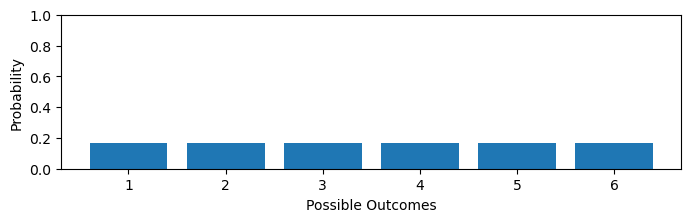

In [47]:
# Possible outcomes of of dice roll
outcomes= np.arange(1,7)

# Probabilities of dice roll
probabilities= np.full(1, 1/6)

plt.figure(figsize= (8,2))
plt.bar(outcomes, probabilities)
plt.xlabel('Possible Outcomes')
plt.ylabel('Probability')
plt.xticks(outcomes)
plt.ylim(0,1)
plt.show

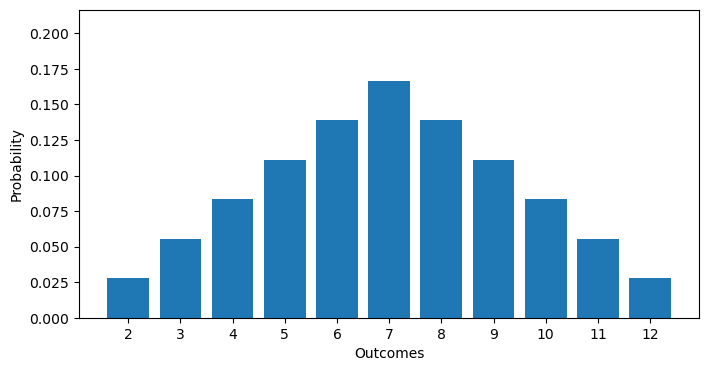

In [59]:
# Possible outcomes of 2 dices roll
outcomes= np.arange(2,13) # this shows that the results can be in between 2 and 12.

probabilities= [sum([(i == j+k) for j in range(1,7) for k in range(1,7)])/36 for i in outcomes]

plt.figure(figsize=(8,4))
plt.bar(outcomes,probabilities)
plt.xlabel('Outcomes')
plt.ylabel('Probability')
plt.xticks(outcomes)
plt.ylim(0, max(probabilities) + 0.05)
plt.show()

In [19]:
!pip install scipy
import numpy as np
from scipy import stats
import scipy.stats as stats
from scipy.stats import t
import matplotlib.pyplot as plt

In [27]:
score= [72,74,73,70,75,76,73,72,71,74,78,72,73,70,74,76,75,77,72,73,74,75,76,77,78,74,75,76,77,73,

72,74,73,70,75,76,73,72,71,74,78,72,73,70,74,76,75,77,72,73,74,75,76,77,78,74,75]


n= len(score)
print(f'Length= {n}')

df= n-1

pop_mean= 70
sample_mean= np.mean(score)
print(f'sample_mean= {sample_mean}')

# Sample standard deviation
sample_std= np.std(score, ddof=1) # We use ddof for samples standard deviation.
print(f'standard deviation of sample= {sample_std}')

# Standard error of mean
std_error= sample_std/np.sqrt(n)
print(f'Standard error of mean= {std_error}')

significance_val = 0.05

# t score
t= (sample_mean-pop_mean)/std_error
print(f't score= {t}')


Length= 57
sample_mean= 74.10526315789474
standard deviation of sample= 2.185048303865515
Standard error of mean= 0.28941671802199664
t score= 14.184609603591475


In [28]:
t_score= t

In [31]:
from scipy.stats import t
p_value = 1 - t.cdf(14.184,56)
p_value

0.0

In [46]:
sales= [1020,1050,1070,1030,1045,1100,1025,1060,1080,1010,1090,1040,1055,1075,1035,1020,1050,1070,1030,1045,1100,1025,1060,1080,1010,1090,1040,1055,1075,1035]

pop_mean= 1000

sample_mean= np.mean(sales)
print(sample_mean)

std_dev= np.std(sales,ddof=1)
print(std_dev)

N= len(sales)
print(N)

df= N-1

SEM= std_dev/np.sqrt(N)
print(SEM)

t_score= (sample_mean-pop_mean)/SEM
t_score

p_value= 1- t.cdf(t_score, df)
print(p_value)

# As p value <<< significance value, so we reject null hypothesis.

1052.3333333333333
26.186773883714306
30
4.78102892146583
4.083733351478713e-12


# Example

Suppose a pharmaceutical company has developed a new drug to lower blood pressure. The known average blood pressure of the general population with a certain condition is 140 mmHg, and this average is based on a large amount of data, so the population standard deviation is known to be 20 mmHg.

* Null Hypothesis: New drug will not lower the blood pressure. mean=140 mmgHg
* Alternative Hypothesis: New drug will lower the blood pressure. mean< 140 mmHg

In [48]:
pop_mean= 140
pop_std= 20

n= 50
sample_mean= 135

# Standard error
SE= pop_std/np.sqrt(n)

significance_value= 0.05

# z_score
z_score= (sample_mean-pop_mean)/SE
z_score

-1.7677669529663689

In [52]:
from scipy.stats import norm
# p_value
p_value = norm.cdf(z_score)
p_value

# Since p_value is smaller than significance value so we reject null hypothesis.

0.03854993587177085

Suppose a company wants to test if there is a significant association between gender (male and female) and preference for a new product (like and dislike).
#### Null Hypothesis
There is no association between genders and product preference.

#### Alternative Hypothesis:
There is association between genders and product preference.

# Expected Frequencies
E= (row total * column total)/grand total.

In [54]:
E11= (70*50)/100 # Male Like
E12= (30*50)/100 # Male Dislike
E13= (70*50)/100 # Female like
E14= (30*50)/100 # Female dislike

print(E11,E12,E13,E14)

35.0 15.0 35.0 15.0


### Degree of freedom
df= (no of rows-1)x(no of columns - 1)

In [55]:
df= (2-1)*(2-1)
df

1

### Chi Square Statistics (X^2)

X^2= sum((Observed frequency-Expected frequency)^2)/Expected Frequency

In [60]:
chi_square_statistics= ((30-35)**2)/35 + ((20-15)**2)/15 + ((40-35)**2)/35 + ((10-15)**2)/15
chi_square_statistics

4.761904761904762

#### Critical value
It can be checked from the critical value chart and from there we get it as 19.65. So chi square statistics is less than critical valu so we can say that there is no enough evidence to suggest association between the variable.

## One sample T test
A nutritionist claims that a new diet program significantly changes participants' average weight. The known average weight of the general population is 70 kg. The nutritionist wants to test this claim with a sample of participants who completed the program.

### Hypotheses
* Null Hypothesis (H0): The diet program does not change the average weight. μ=70 kg
* Alternative Hypothesis (H1): The diet program changes the average weight. Μ!=70 kg

In [61]:
n= 10
std_deviation= 3
pop_mean= 70
sample_mean= 68

t_score= (sample_mean-pop_mean)/(std_deviation/np.sqrt(n))
t_score

-2.1081851067789197

In [62]:
df= 10-1
p_value= 1- t.cdf(t_score, df)
print(p_value)


0.9678705754520742


#### As p_value >> than t_score, so we can go with the null hypothesis.

## Two sample T test
In two sample t test, we use this formula to calculate t_score
* t_score= (sample_mean_1 - sample_mean_2)/(((std_dev_1)**2)/(n1) + ((std_dev_2)**2)/(n2))

### Degree of formation
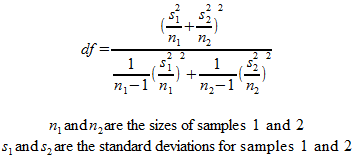

# One-Way ANOVA (Analysis of Variance)
One-Way ANOVA is used to compare means across more than two groups to see if at least one group mean is statistically different from the others. It's called "one-way" because there is only one independent variable (factor).

#### Scenario
A school wants to evaluate the effectiveness of four different teaching methods on students' final exam scores in mathematics. The goal is to determine if there is a significant difference in effectiveness among these methods.

#### Hypotheses
* Null Hypothesis (H0): There is no difference in the average exam scores among the four teaching methods.
* Alternative Hypothesis (H1): At least one teaching method leads to a significantly different average exam score compared to the others.

#### Data
Let's say the school conducts an experiment with four groups of students, each taught by a different method. After the teaching period, the students are given the same standardized exam. The following scores are obtained:
* Method A: [82, 78, 90, 88, 84]
* Method B: [76, 72, 71, 74, 73]
* Method C: [85, 87, 89, 90, 92]
* Method D: [78, 75, 80, 79, 77]


In [66]:
A= [82, 78, 90, 88, 84]
B= [76, 72, 71, 74, 73]
C= [85, 87, 89, 90, 92]
D= [78, 75, 80, 79, 77]

# N
N= len(A)+ len(B) + len(C) + len(D)
print(f'N= {N}')

n= len(A)
print(f'n= {n}')

a=4 # No of sets.

N= 20
n= 5


#### Degree of freedom
Here we have to calculate three df's that are:
* df(between)= a - 1
* df(within)= N - a
* df(total)= N - 1

In [68]:
df_btw= a-1
print(f'df(between)= {df_btw}')

df_wit= N-a
print(f'df(within)= {df_wit}')

df_tot= N-1
print(f'df(total)= {df_tot}')

df(between)= 3
df(within)= 16
df(total)= 19


### State decision rule
* (df(between), df(within))
* (3,16)
* By using this value we will check the critical value.
* Critical value= 3.24

### F factor
F= MS between/ MS within
* For calculating it we need to calculate the following things first.

# SS between

In [81]:
x= (sum(A)**2+sum(B)**2+sum(C)**2+sum(D)**2)/n
y= ((sum(A)+ sum(B)+sum(C)+sum(D))**2)/N
print(x)
print(y)
SS_btw= x-y
print(f'SS(between)= {SS_btw}')

131922.0
131220.0
SS(between)= 702.0


# SS within

In [96]:
Y= 0
for x in A:
    Y2 += x**2 
print(f'Sum of square of values in A= {Y2}')

Y0= 0
for y in B:
    Y0 += y**2 
print(f'Sum of square of values in A= {Y0}')

Y01= 0
for z in C:
    Y01 += z**2 
print(f'Sum of square of values in A= {Y01}')

Y02= 0
for v in D:
    Y02 += v**2 
print(f'Sum of square of values in A= {Y02}')



Sum of square of values in A= 253527
Sum of square of values in A= 26806
Sum of square of values in A= 39279
Sum of square of values in A= 30279


In [98]:
sum_of_Y2= Y+Y0+Y01+Y02
sum_of_Y2

96364

In [99]:
SS_within= sum_of_Y2-SS_btw
print(f'SS(within)= {SS_within}')

SS(within)= 95662.0


# SS(total)

In [101]:
SS_tot= sum_of_Y2-y
print(f'SS(total)= {SS_tot}')

SS(total)= 96291


# MS(between)

In [102]:
MS_btw= SS_btw/df_btw
print(f"MS_between= {MS_btw}")

MS_between= 234.0


# MS(within)

In [103]:
MS_wit= SS_within/df_wit
print(f'MS_within= {MS_wit}')

MS_within= 5978.875


# MS(total)

In [104]:
MS_tot= SS_tot/df_tot
print(f'MS_total= {MS_tot}')

MS_total= 5067.9473684210525


# F

In [105]:
F= MS_btw/MS_wit
print(f"F= {F}")

F= 0.03913779766260375


#### So here F is less than critical value so we can not reject null hypothesis.

# TWO WAY ANOVA
Two way anova is used to test the effects of two categorical variables on a continuous variable. 

* In two way anova, we check whether one variable have effect on independent variable.
* We check whether other variable have effect on independent variable.
* Whether there is interaction between two variables.

##### So in two way Anova, we have 3 Null Hypothesis and 3 Alternative Hypothesis.

### Assumptions:
For the test should be valid, several assumptions should be met:
* The data in the groups should be normally distributive. (This can be checked by quantile quantile plot)
* The variance in groups should be equal. (This can be checked with levene's test)
* The measurements should be independent, i.e the measure value should not be influence by other group value.
* The dependent variable should have a metric scale level. 


#### Scenario

A health research center wants to investigate the effects of exercise intensity and diet type on weight loss. They design an experiment with two factors: exercise intensity (Low, High) and diet type (Vegetarian, Keto). The goal is to determine if these factors independently affect weight loss and if there's an interaction between them.

#### Null Hypotheses (H0):

* There is no effect of exercise intensity on weight loss.

* There is no effect of diet type on weight loss.

* There is no interaction effect between exercise intensity and diet type on weight loss.

#### Alternative Hypotheses (H1):

* There is an effect of exercise intensity on weight loss.

* There is an effect of diet type on weight loss.

* There is an interaction effect between exercise intensity and diet type on weight loss.

#### Data

Participants are randomly assigned to one of four groups based on a combination of exercise intensity and diet type. After 8 weeks, their weight loss is recorded. The data (weight loss in kg) might look something like this:

* Low Intensity, Vegetarian Diet: [3, 2, 4]

* Low Intensity, Keto Diet: [5, 4, 6]

* High Intensity, Vegetarian Diet: [4, 5, 3]

* High Intensity, Keto Diet: [8, 7, 9]

## Step 1:
#### Calculating means of all datasets.

In [107]:
A= [3,2,4] # Low intensity, Vegetarian diet
mean_A= np.mean(A)
print(f'Mean of A= {mean_A}')

B= [5,4,6] # Low intensity, Keto diet
mean_B= np.mean(B)
print(f'Mean of B= {mean_B}')

C= [4,5,3]
mean_C= np.mean(C)
print(f'Mean of C= {mean_C}')

D=[8,7,9]
mean_D= np.mean(D)
print(f'Mean of D= {mean_D}')

Mean of A= 3.0
Mean of B= 5.0
Mean of C= 4.0
Mean of D= 8.0


In [109]:
# Mean of low intensity.
mean_L_I= (mean_A+mean_B)/2
print(f'Mean of Low intensity= {mean_L_I}')

# Mean of High intensity
mean_H_I= (mean_C+mean_D)/2
print(f'Mean of High intensity= {mean_H_I}')

# Mean of Vegetarian diet
mean_V_D= (mean_A+mean_C)/2
print(f'Mean of Vegetarian diet= {mean_V_D}')

# Mean of Keto Diet
mean_K_D= (mean_B+mean_D)/2
print(f'Mean of Keto diet= {mean_K_D}')


Mean of Low intensity= 4.0
Mean of High intensity= 6.0
Mean of Vegetarian diet= 3.5
Mean of Keto diet= 6.5


In [110]:
# Total mean
total_mean= (mean_H_I+mean_K_D+mean_L_I+mean_V_D)/4
print(f'Total mean= {total_mean}')

Total mean= 5.0


## Step 2

### 1. SS(total)
SStot= sum(subtracting total mean from each individual value)^2 

In [128]:
print(A,B,C,D)

[3, 2, 4] [5, 4, 6] [4, 5, 3] [8, 7, 9]


In [118]:
SS_total_A= 0
for i in A:
    y= (i-total_mean)**2
    SS_total_A += y
    
SS_total_B= 0
for j in B:
    y1= (j-total_mean)**2
    SS_total_B += y1
    
SS_total_C= 0
for k in C:
    y2= (k-total_mean)**2
    SS_total_C += y2

SS_total_D= 0
for l in D:
    y3= (l-total_mean)**2
    SS_total_D += y3
    
SS_total= SS_total_A +SS_total_B +SS_total_C +SS_total_D
print(f'SS_total= {SS_total}')

SS_total= 50.0


## Degree of freedom (dftot)
#### dftot= n.p.q-1
* n= no of values in a group
* p= no of groups factors A
* q= no of groups factors B

In [132]:
n= 3
p= 2
q= 2
df_total= (n*p*q)-1
print(f'df_total= {df_total}')

df_total= 11


## Total variance
total_variance= SS_total/df_total

In [133]:
tot_var= SS_total/df_total
print(f'Total variance= {tot_var}')

Total variance= 4.545454545454546


# STEP 2
## 2. SS_between
SS_between= sum(group mean-total mean)**2

In [138]:
SS_between= n*(((mean_A-total_mean)**2)+((mean_B-total_mean)**2)+((mean_C-total_mean)**2)+((mean_D-total_mean)**2))
print(f'SS_between= {SS_between}')

SS_between= 42.0


## df_between
df_btw= p.q-1

In [140]:
df_btw= (p*q)-1
print(f'df_between= {df_btw}')

df_between= 3


## Variance_btw
variance_btw= SS_btw/df_btw

In [142]:
variance_btw= SS_between/df_btw
print(f'variance_between= {variance_btw}')

variance_between= 14.0


# STEP 3
## 3. SS_A
SS_A= sum(mean value of group Factor A- Total mean)**2

In [144]:
SS_A= n*q*((mean_L_I-total_mean)**2+(mean_H_I-total_mean)**2)
print(f'SS_A= {SS_A}')

SS_A= 12.0


## df_A
df_A= p-1

In [145]:
df_A= p-1
print(f'df_A= {df_A}')

df_A= 1


## Variance for factor A
var_A= SS_A/df_A

In [146]:
var_A= SS_A/df_A
print(f'Variance for factor A= {var_A}')

Variance for factor A= 12.0


# STEP 4
## 4. SS_B
SS_A= sum(mean value of group Factor A- Total mean)**2

In [147]:
SS_B= n*q*((mean_K_D-total_mean)**2+(mean_V_D-total_mean)**2)
print(f'SS_B= {SS_B}')

SS_B= 27.0


## df_B
df_B= q-1

In [148]:
df_B= q-1
print(f'df_B= {df_B}')

df_B= 1


## Variance for factor B
var_B= SS_B/df_B

In [149]:
var_B= SS_B/df_B
print(f'Variance for factor B= {var_B}')

Variance for factor B= 27.0


# STEP 5
## 5. SS_AB
SS_AB= SSbtw - SS_A - SS_B

In [151]:
SS_AB= SS_between-SS_A-SS_B
print(f'SS_AB= {SS_AB}')

SS_AB= 3.0


## df_AB
df_AB= (p-1)*(q-1)

In [152]:
df_AB= (p-1)*(q-1)
print(f'df_AB= {df_AB}')

df_AB= 1


## Variance_AB
var_AB= SS_AB/df_AB

In [153]:
var_AB= SS_AB/df_AB
print(f'var_AB= {var_AB}')

var_AB= 3.0


# STEP 6
SSerr= sum(individual value of the group - mean value of the group)**2

In [154]:
print(A,B,C,D)

[3, 2, 4] [5, 4, 6] [4, 5, 3] [8, 7, 9]


In [157]:
sum0= 0
for a in A:
    a1= (a-mean_A)**2
    sum0 += a1
    
sum1= 0
for b in B:
    b1= (b-mean_A)**2
    sum1 += b1
    
sum2= 0
for c in C:
    c1= (c-mean_A)**2
    sum2 += c1
    
sum3= 0
for d in D:
    d1= (d-mean_A)**2
    sum3 += d1

SSerr= sum0+sum1+sum2+sum3
print(f'SSerr= {SSerr}')

SSerr= 98.0


## df_err
df_err= (n-1)*p*q

In [158]:
df_err= (n-1)*p*q
print(f'df_err= {df_err}')

df_err= 8


## Variance_err
var_err= SSerr/df_err

In [159]:
var_err= SSerr/df_err
print(f'Variance_err= {var_err}')

Variance_err= 12.25


# STEP 7
## 7. F values
F= variance/var_err

In [161]:
# F_A
F_A= var_A/var_err
print(f'F_A= {F_A}')

# F_B
F_B= var_B/var_err
print(f'F_B= {F_B}')

# F_AB
F_AB= var_AB/var_err
print(f'F_AB= {F_AB}')

F_A= 0.9795918367346939
F_B= 2.204081632653061
F_AB= 0.24489795918367346


In [163]:
df_err

8

In [164]:
from scipy.stats import f

In [165]:
# p_value for A
p_value_A = f.sf(F_A, df_A, df_err)
print(f'p_value_A= {p_value_A}')

# p_value for B
p_value_B = f.sf(F_B, df_B, df_err)
print(f'p_value_B= {p_value_B}')

# p_value for AB
p_value_AB = f.sf(F_AB, df_AB, df_err)
print(f'p_value_AB= {p_value_AB}')


p_value_A= 0.35128646594749785
p_value_B= 0.17594375944701604
p_value_AB= 0.6339942565527656


## Results
As all of the p_values are greater than significance value, so we can say that there is not sufficient evidence to demonstrate it.